In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.options.display.max_columns=50

In [2]:
import os

In [3]:
os.getcwd()

'c:\\Users\\nasut\\OneDrive\\Documents\\Kuliah\\Semester 7\\PKKM\\BMKG\\Project\\MONAS-Dashboard\\Modelling'

In [20]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.load_model('./xgbregressor_humidity.json')

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\core.py:160: UserWarning: [18:17:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:873: Found JSON model saved before XGBoost 1.6, please save the model using current version again. The support for old JSON model will be discontinued in XGBoost 2.3.
  warnings.warn(smsg, UserWarning)


In [21]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             feature_types=['float', 'float', 'float', 'float', 'float',
                            'float', 'float', 'float', 'float', 'float',
                            'float', 'float', 'float', 'float', 'float',
                            'float', 'f...
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
hyperparam = model.get_params()

In [24]:
df_input_ina_nwp = pd.read_csv('../../Data/MONAS-input_nwp_compile.csv')
df_input_ina_nwp

,lokasi,Date,suhu2m(degC),dew2m(degC),rh2m(%),wspeed(m/s),wdir(deg),lcloud(%),mcloud(%),hcloud(%),surpre(Pa),clmix(kg/kg),wamix(kg/kg),outlr(W/m2),pblh(m),lifcl(m),cape(j/kg),mdbz,t950(degC),rh950(%),ws950(m/s),wd950(deg),t800(degC),rh800(%),ws800(m/s),wd800(deg),t500(degC),rh500(%),ws500(m/s),wd500(deg),prec_nwp,LAT,LON,ELEV
0,96001,2023-10-17 15:00:00,27.4007,23.6856,80.3053,4.25554,191.08600,0.374474,1.000000,0.855219,100903.0,0.0,0.017137,180.376,526.076,616.078,406.014,13.7824,23.0678,74.5583,5.87159,191.4640,16.0404,73.3359,8.18965,242.5890,-4.71925,94.9932,4.68350,76.8328,2.923480e-19,5.87655,95.33785,126
1,96001,2023-10-17 18:00:00,27.4089,23.0971,77.4673,3.20000,228.61600,0.262561,1.000000,0.872848,100735.0,0.0,0.016653,196.935,491.829,689.544,287.453,19.0351,23.3155,71.6113,4.21652,217.4370,15.9013,73.9679,6.67126,204.7110,-4.99763,95.7026,4.83021,124.4510,1.034630e-19,5.87655,95.33785,126
2,96001,2023-10-17 21:00:00,27.3820,23.8747,81.3127,6.43993,224.35900,0.431500,1.000000,0.849396,100655.0,0.0,0.017185,232.870,558.189,618.759,620.873,0.0000,22.9912,75.4084,8.67978,222.8060,15.6937,73.0260,5.34901,203.9090,-5.10086,95.3166,4.00113,107.2340,0.000000e+00,5.87655,95.33785,126
3,96001,2023-10-18 00:00:00,27.4679,23.7839,80.4639,6.91585,220.91600,0.317385,1.000000,0.524404,100769.0,0.0,0.016910,233.885,532.027,644.846,428.753,0.0000,22.9836,77.4899,8.76241,220.2100,15.4617,74.9905,4.76448,191.2090,-4.39951,84.1607,3.31394,114.2420,0.000000e+00,5.87655,95.33785,126
4,96001,2023-10-18 03:00:00,27.9673,23.2775,75.7992,6.28717,214.11300,0.252877,0.785813,0.610115,100950.0,0.0,0.016377,268.016,700.017,786.830,229.671,0.0000,23.1852,76.8484,7.11073,212.3090,14.9336,76.5370,3.94272,217.0360,-4.74009,86.5560,3.79705,166.5850,0.000000e+00,5.87655,95.33785,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,99992,2023-10-20 00:00:00,26.8513,19.0878,62.5816,1.52901,146.67200,0.051358,0.210951,0.000000,100571.0,0.0,0.013547,287.580,424.941,2139.000,-0.100,0.0000,23.6648,65.5740,5.75998,100.6410,15.3491,71.3439,9.53871,94.4738,-4.78717,37.3070,3.18159,304.7020,0.000000e+00,-6.30253,106.75636,41
4148,99992,2023-10-20 03:00:00,32.5296,17.3364,40.4115,2.83196,76.91420,0.000000,0.227088,0.000000,100550.0,0.0,0.012277,304.315,1399.820,1910.010,-0.100,0.0000,26.7487,51.9330,3.24100,85.2487,15.5818,60.1363,10.88190,99.9526,-4.34492,31.4119,2.67764,274.8970,0.000000e+00,-6.30253,106.75636,41
4149,99992,2023-10-20 06:00:00,33.2196,21.2222,49.5108,6.39935,10.12190,0.000000,0.495652,0.000000,100316.0,0.0,0.015354,301.166,1036.540,1510.300,1030.700,0.0000,27.3323,60.4585,7.04615,15.0992,15.9853,67.9167,6.33450,121.2080,-4.53275,34.5896,2.30676,282.9150,3.250240e-03,-6.30253,106.75636,41
4150,99992,2023-10-20 09:00:00,31.2358,21.8844,57.6837,5.41735,1.79568,0.000000,0.589733,0.000000,100266.0,0.0,0.015657,295.828,978.651,1278.150,761.442,0.0000,26.0223,68.4350,6.25955,16.7635,15.8179,74.5408,7.09150,106.4220,-4.10275,29.5415,2.16724,244.8240,1.239780e-05,-6.30253,106.75636,41


In [25]:
input_ina_nwp = df_input_ina_nwp.drop(columns=[ 'prec_nwp', 'LAT', 'LON'])

In [29]:
# test prediction using ina_nwp_input
input_ina_nwp_filtered = input_ina_nwp.rename(
    columns={
        'suhu2m(degC)' : 'suhu2m.degC.',
        'dew2m(degC)' : 'dew2m.degC.',
        'rh2m(%)' : 'rh2m...',
        'wspeed(m/s)' : 'wspeed.m.s.',
        'wdir(deg)' : 'wdir.deg.',
        'lcloud(%)' : 'lcloud...',
        'mcloud(%)' : 'mcloud...' ,
        'hcloud(%)' : 'hcloud...',
        'surpre(Pa)' : 'surpre.Pa.' ,
        'clmix(kg/kg)' : 'clmix.kg.kg.' ,
        'wamix(kg/kg)' : 'wamix.kg.kg.' ,
        'outlr(W/m2)' : 'outlr.W.m2.' ,
        'pblh(m)' : 'pblh.m.',
        'lifcl(m)' : 'lifcl.m.' ,
        'cape(j/kg)' : 'cape.j.kg.' ,
        'mdbz' : 'mdbz' ,
        't950(degC)' : 't950.degC.' ,
        'rh950(%)' : 'rh950...',
        'ws950(m/s)' : 'ws950.m.s.' ,
        'wd950(deg)' : 'wd950.deg.' ,
        't800(degC)' : 't800.degC.' ,
        'rh800(%)' : 'rh800...' ,
        'ws800(m/s)' : 'ws800.m.s.',
        'wd800(deg)' : 'wd800.deg.' ,
        't500(degC)' : 't500.degC.' ,
        'rh500(%)' : 'rh500...' ,
        'ws500(m/s)' : 'ws500.m.s.' ,
        'wd500(deg)' : 'wd500.deg.',
})

In [31]:
output_humid_ina_nwp = model.predict(input_ina_nwp_filtered.drop(['Date', 'mcloud...', 'wamix.kg.kg.', 'clmix.kg.kg.', 'lcloud...', 'hcloud...'], axis=1))
output_humid_ina_nwp

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

array([83.37135 , 84.75032 , 81.520134, ..., 48.920624, 56.70622 ,
       66.43083 ], dtype=float32)

In [32]:
#OUTPUT

output_df_pred = pd.concat([input_ina_nwp['Date'], input_ina_nwp_filtered[['lokasi', 'rh2m...']], pd.Series(output_humid_ina_nwp, index = input_ina_nwp_filtered.index)], axis=1)
output_df_pred.columns = ['Date','lokasi', 'rh2m...', 'prediction']
output_df_pred = output_df_pred.dropna()

In [33]:
output_df_pred

,Date,lokasi,rh2m...,prediction
0,2023-10-17 15:00:00,96001,80.3053,83.371353
1,2023-10-17 18:00:00,96001,77.4673,84.750320
2,2023-10-17 21:00:00,96001,81.3127,81.520134
3,2023-10-18 00:00:00,96001,80.4639,81.959892
4,2023-10-18 03:00:00,96001,75.7992,70.463509
...,...,...,...,...
4147,2023-10-20 00:00:00,99992,62.5816,80.262512
4148,2023-10-20 03:00:00,99992,40.4115,53.427265
4149,2023-10-20 06:00:00,99992,49.5108,48.920624
4150,2023-10-20 09:00:00,99992,57.6837,56.706219


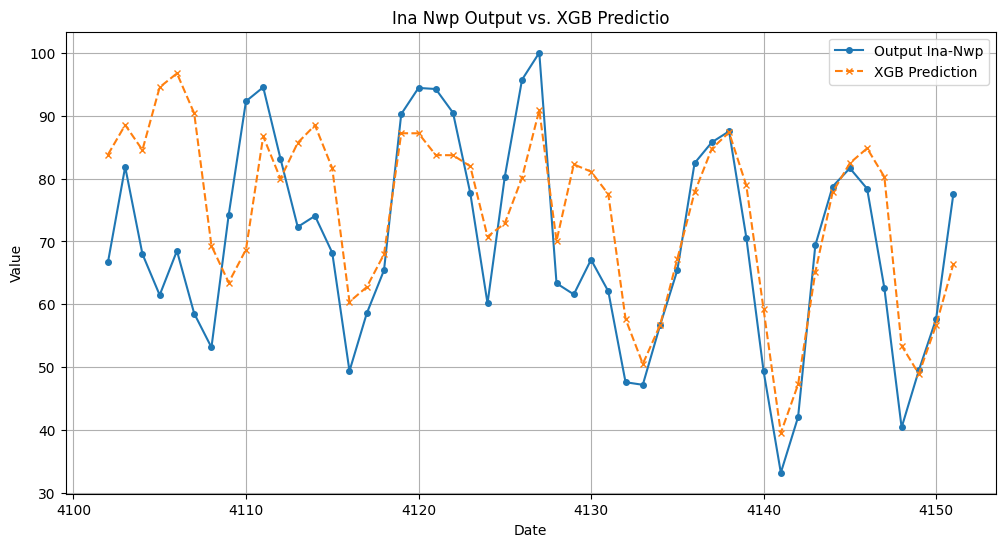

In [34]:
plt.figure(figsize=(12, 6))

plt.plot(output_df_pred.iloc[-50:].index, output_df_pred.iloc[-50:]['rh2m...'], label='Output Ina-Nwp', marker='o', markersize=4)
plt.plot(output_df_pred.iloc[-50:].index, output_df_pred.iloc[-50:]['prediction'], label='XGB Prediction', linestyle='--', marker='x', markersize=4)

plt.title('Ina Nwp Output vs. XGB Predictio')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.show()

In [50]:
model.save_model("humid_xgb_tuned_noShuffle.json")